In [2]:
import numpy as np
import pandas as pd
import os
import time
import warnings
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [62]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
audio_dataset_path="C:/Users/pavan/Music/Avi-Audio Net/static/DATASET/wavfiles"                    #change the path 
metadata = pd.read_csv("C:/Users/pavan/Music/Avi-Audio Net/static/DATASET/bird_songs_metadata5.csv")
metadata.head()

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838.0,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51:00,2020-03-14 00:00:00,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838.0,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51:00,2020-03-14 00:00:00,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838.0,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51:00,2020-03-14 00:00:00,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838.0,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51:00,2020-03-14 00:00:00,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838.0,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51:00,2020-03-14 00:00:00,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [8]:
metadata['name'].value_counts()

name
Eurasian Jay            1797
Song Sparrow            1255
Common Cuckoo           1213
House Sparrow           1192
Northern Mockingbird    1182
European Goldfinch      1108
Northern Cardinal       1074
Eurasian Bluetit        1073
American Robin          1017
Bewick's Wren            893
Name: count, dtype: int64

In [10]:
# Function to extract features from audio files
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [14]:
# Load metadata
metadata = pd.read_csv('C:/Users/pavan/Music/Avi-Audio Net/static/DATASET/bird_songs_metadata5.csv')

In [16]:
# Extract features from audio files
extracted_features = []
for index, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), str(row["filename"]))
    final_class_labels = row["name"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

100%|██████████| 11804/11804 [05:20<00:00, 36.88it/s]


In [20]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','name'])
extracted_features_df.head()
# Storing the dataframe to pickle for further processing
extracted_features_df.to_pickle("extracted_df.pkl")
extracted_features_df.head()

,feature,name
0,"[-132.85225, 81.1399, 17.018223, 54.974297, -1...",Bewick's Wren
1,"[-147.74393, 99.42544, 20.885643, 44.11881, 1....",Bewick's Wren
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",Bewick's Wren
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",Bewick's Wren
4,"[-107.95914, 92.416, 17.773256, 43.13245, -1.8...",Bewick's Wren


In [22]:
final = pd.read_pickle("./extracted_df.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["name"].tolist())

In [66]:
        import IPython.display as ipd
        import librosa
        import librosa.display
        import pandas as pd
        import os, time, warnings
        import seaborn as sns
        import numpy as np
        from tqdm import tqdm
        import matplotlib.pyplot as plt
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import LabelEncoder
        from tensorflow.keras.utils import to_categorical
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import (
            Dense,
            Conv1D,
            MaxPooling1D,
            BatchNormalization,
            Dropout, 
            Flatten,
            Conv2D,
            MaxPool2D,
        )

In [67]:
# Convert features and labels to numpy arrays
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'name'])
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['name'].tolist())

In [70]:
# Encode labels
le = LabelEncoder()
Y = to_categorical(le.fit_transform(y))

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  10623
Number of testing samples =  1181


In [74]:

# Define the neural network model
num_labels = Y.shape[1]
model = Sequential([
    Dense(2000, activation='relu', input_shape=(40,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1000, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(750, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(500, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(250, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_labels, activation='softmax')
])

model.summary()

C:\Users\pavan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2000)           │        82,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2000)           │         8,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1000)           │     2,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 750)            │         3,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 750)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 250)            │         1,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,383,760 (12.91 MB)

 Trainable params: 3,374,460 (12.87 MB)

 Non-trainable params: 9,300 (36.33 KB)

In [75]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)

In [86]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=50,
    epochs=10,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4921 - loss: 1.2538 - val_accuracy: 0.5809 - val_loss: 1.0240 - learning_rate: 0.0010
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5061 - loss: 1.2193 - val_accuracy: 0.5970 - val_loss: 1.0311 - learning_rate: 0.0010
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5172 - loss: 1.2271 - val_accuracy: 0.5978 - val_loss: 1.0048 - learning_rate: 0.0010
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5146 - loss: 1.1927 - val_accuracy: 0.5970 - val_loss: 0.9932 - learning_rate: 0.0010
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5278 - loss: 1.1823 - val_accuracy: 0.6037 - val_loss: 0.9919 - learning_rate: 0.0010
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5371 - loss: 1.1738 - val_accuracy: 0.6097 - val_loss: 0.9774 - learning_rate: 0.0010
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5488 - loss: 1.

In [82]:
# Save the model
model.save("Model1.h5")
print("ANN Model Saved")

ANN Model Saved


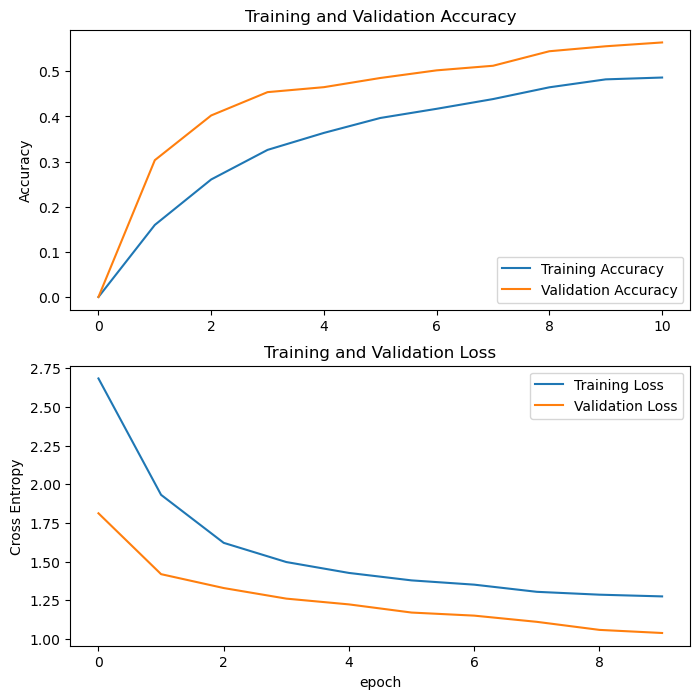

In [84]:
 acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()